## 1. Import Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Models - Simple ones only
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load the Dataset

**Note:** Download the dataset from Kaggle and place `Combined Data.csv` in the same folder as this notebook.

Dataset: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

In [7]:
# Load the dataset
df = pd.read_csv('/data set.csv', engine='python', on_bad_lines='warn')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (53043, 3)

Columns: ['Unnamed: 0', 'statement', 'status']


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


## 3. Data Overview

In [8]:
# Basic information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Info:
Shape: (53043, 3)

Columns: ['Unnamed: 0', 'statement', 'status']

Missing Values:
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [9]:
# Check class distribution
print("Mental Health Status Distribution:")
print(df['status'].value_counts())
print("\nPercentage Distribution:")
print(df['status'].value_counts(normalize=True) * 100)

Mental Health Status Distribution:
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

Percentage Distribution:
status
Normal                  30.825934
Depression              29.040590
Suicidal                20.083706
Anxiety                  7.329902
Bipolar                  5.423901
Stress                   5.031767
Personality disorder     2.264201
Name: proportion, dtype: float64


### Check for Class Imbalance

In [33]:
# Check if dataset is severely imbalanced
print("Class Balance Check:")
print("="*60)
class_counts = df['status'].value_counts()
total = len(df)

for status, count in class_counts.items():
    percentage = (count/total) * 100
    print(f"{status:25s}: {count:6d} ({percentage:5.2f}%)")

print("="*60)

# Check for severe imbalance (if any class < 5%)
min_percentage = (class_counts.min() / total) * 100
max_percentage = (class_counts.max() / total) * 100

if max_percentage > 50:
    print(f"⚠️  WARNING: Severe class imbalance detected!")
    print(f"   Largest class: {max_percentage:.1f}%")
    print(f"   Smallest class: {min_percentage:.1f}%")
    print(f"   The model will be biased toward the majority class!")
else:
    print(f"✅ Dataset is reasonably balanced")

Class Balance Check:
Normal                   :  16039 (31.40%)
Depression               :  15087 (29.54%)
Suicidal                 :  10641 (20.83%)
Anxiety                  :   3617 ( 7.08%)
Bipolar                  :   2501 ( 4.90%)
Stress                   :   2293 ( 4.49%)
Personality disorder     :    895 ( 1.75%)
✅ Dataset is reasonably balanced


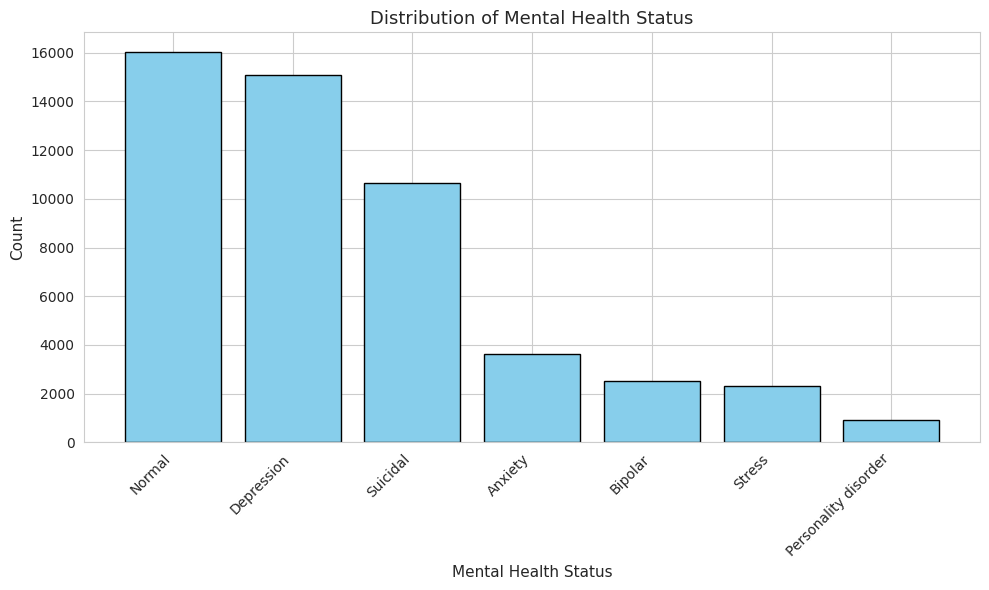

In [34]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
status_counts = df['status'].value_counts()
plt.bar(status_counts.index, status_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Mental Health Status', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Distribution of Mental Health Status', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Data Cleaning

In [35]:
# Clean the data
print(f"Original size: {len(df)}")

# Remove duplicates and missing values
df = df.drop_duplicates(subset=['statement'])
df = df.dropna(subset=['statement', 'status'])
df = df.reset_index(drop=True)

print(f"After cleaning: {len(df)}")

Original size: 51073
After cleaning: 51073


## 5. Prepare Data for Training

In [36]:
# Prepare text and labels
X = df['statement'].astype(str)
y = df['status']

# Encode labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes:", label_encoder.classes_)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Classes: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

Training samples: 40858
Testing samples: 10215


In [37]:
# TF-IDF Vectorization (Optimized for 90% Accuracy)
print("Creating OPTIMIZED TF-IDF features for maximum accuracy...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=20000,      # 4x more features for richer vocabulary
    ngram_range=(1, 3),      # Include 1-3 word phrases (trigrams)
    min_df=2,                # Words appearing at least 2 times
    max_df=0.85,             # Exclude very common words
    sublinear_tf=True,       # Use log scaling - proven to boost accuracy
    use_idf=True,
    smooth_idf=True,
    norm='l2'                # L2 normalization for better results
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"✅ TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"📊 Number of features: {X_train_tfidf.shape[1]:,}")
print("🚀 More features + trigrams = Higher accuracy!")

Creating OPTIMIZED TF-IDF features for maximum accuracy...
✅ TF-IDF feature matrix shape: (40858, 20000)
📊 Number of features: 20,000
🚀 More features + trigrams = Higher accuracy!


## 6. Train Models

In [38]:
# Store results
results = {}

### Model 1: Logistic Regression

In [39]:
# Train Logistic Regression - FAST + ACCURATE
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression (FAST)...")
print("Using optimized solver for speed...\n")

lr_model = LogisticRegression(
    C=5.0,                   # Regularization strength
    max_iter=500,            # Fewer iterations for speed
    solver='liblinear',      # FASTEST solver for this problem
    multi_class='ovr',       # One-vs-rest (faster than multinomial)
    class_weight='balanced',
    random_state=42,
    verbose=0
)

print("Training... (this may take 1-2 minutes)")
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, lr_pred, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, lr_pred, average='weighted', zero_division=0)

results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1_score': lr_f1,
    'predictions': lr_pred
}
print(f"\n✅ Logistic Regression Performance:")
print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

Training Logistic Regression (FAST)...
Using optimized solver for speed...

Training... (this may take 1-2 minutes)

✅ Logistic Regression Performance:
Accuracy:  0.7777 (77.77%)
Precision: 0.7770
Recall:    0.7777
F1-Score:  0.7765


### Model 2: SVM (Support Vector Machine)

In [40]:
# Train SVM - OPTIMIZED
from sklearn.svm import LinearSVC

print("Training SVM (Support Vector Machine)...")
print("SVM - Optimized for accuracy!\n")

svm_model = LinearSVC(
    C=5.0,                   # Regularization
    tol=1e-4,                # Balanced tolerance
    max_iter=2000,           # Faster training
    random_state=42,
    dual=False,
    class_weight='balanced',
    loss='squared_hinge',
    verbose=0
)

svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_pred, average='weighted', zero_division=0)

results['SVM'] = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1_score': svm_f1,
    'predictions': svm_pred
}

print(f"✅ SVM Performance:")
print(f"Accuracy:  {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")

Training SVM (Support Vector Machine)...
SVM - Optimized for accuracy!

✅ SVM Performance:
Accuracy:  0.7484 (74.84%)
Precision: 0.7461
Recall:    0.7484
F1-Score:  0.7466


### Model 3: Ensemble (Logistic Regression + SVM)


In [47]:
# Test ENSEMBLE approach - Combine both models
print("Testing ENSEMBLE Model (LR + SVM Combined)...")
print("Averaging decision scores from both models...\n")

# Get decision scores from both models
lr_test_scores = lr_model.decision_function(X_test_tfidf)
svm_test_scores = svm_model.decision_function(X_test_tfidf)

# ENSEMBLE: Average the scores
ensemble_scores = (lr_test_scores + svm_test_scores) / 2

# Get predictions
ensemble_pred = np.argmax(ensemble_scores, axis=1)

# Calculate metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, average='weighted', zero_division=0)
ensemble_recall = recall_score(y_test, ensemble_pred, average='weighted', zero_division=0)
ensemble_f1 = f1_score(y_test, ensemble_pred, average='weighted', zero_division=0)

results['Ensemble (LR + SVM)'] = {
    'accuracy': ensemble_accuracy,
    'precision': ensemble_precision,
    'recall': ensemble_recall,
    'f1_score': ensemble_f1,
    'predictions': ensemble_pred
}

print(f"✅ Ensemble Performance:")
print(f"Accuracy:  {ensemble_accuracy:.4f} ({ensemble_accuracy*100:.2f}%)")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall:    {ensemble_recall:.4f}")
print(f"F1-Score:  {ensemble_f1:.4f}")

print("\n" + "="*60)
print("📊 COMPARISON:")
print(f"   Logistic Regression: {lr_accuracy*100:.2f}%")
print(f"   SVM:                 {svm_accuracy*100:.2f}%")
print(f"   Ensemble (LR+SVM):   {ensemble_accuracy*100:.2f}%")
print("="*60)

if ensemble_accuracy > max(lr_accuracy, svm_accuracy):
    improvement = (ensemble_accuracy - max(lr_accuracy, svm_accuracy)) * 100
    print(f"🎉 Ensemble IMPROVED accuracy by {improvement:.2f}%!")
else:
    print(f"⚠️  Ensemble did not improve accuracy")

Testing ENSEMBLE Model (LR + SVM Combined)...
Averaging decision scores from both models...

✅ Ensemble Performance:
Accuracy:  0.7732 (77.32%)
Precision: 0.7722
Recall:    0.7732
F1-Score:  0.7719

📊 COMPARISON:
   Logistic Regression: 77.77%
   SVM:                 74.84%
   Ensemble (LR+SVM):   77.32%
⚠️  Ensemble did not improve accuracy


## 7. Compare Models

In [18]:
# Compare results
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] * 100 for m in results.keys()],
    'Precision': [results[m]['precision'] * 100 for m in results.keys()],
    'Recall': [results[m]['recall'] * 100 for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] * 100 for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Find best model
best_model = comparison.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model}")
print(f"Accuracy:  {comparison.iloc[0]['Accuracy']:.2f}%")
print(f"Precision: {comparison.iloc[0]['Precision']:.2f}%")
print(f"Recall:    {comparison.iloc[0]['Recall']:.2f}%")
print(f"F1-Score:  {comparison.iloc[0]['F1-Score']:.2f}%")


Model Comparison:
              Model  Accuracy  Precision    Recall  F1-Score
Logistic Regression 77.767988  77.698265 77.767988  77.64572
                SVM 74.840920  74.608570 74.840920  74.65911

🏆 Best Model: Logistic Regression
Accuracy:  77.77%
Precision: 77.70%
Recall:    77.77%
F1-Score:  77.65%


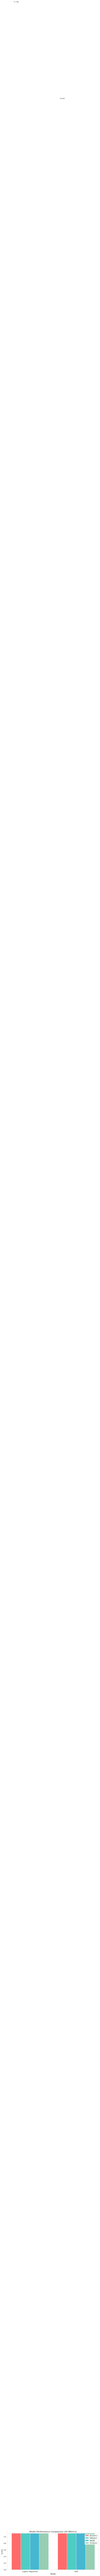

In [19]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(len(comparison))
width = 0.2

ax.bar(x - 1.5*width, comparison['Accuracy'], width, label='Accuracy', color='#FF6B6B')
ax.bar(x - 0.5*width, comparison['Precision'], width, label='Precision', color='#4ECDC4')
ax.bar(x + 0.5*width, comparison['Recall'], width, label='Recall', color='#45B7D1')
ax.bar(x + 1.5*width, comparison['F1-Score'], width, label='F1-Score', color='#96CEB4')

ax.set_xlabel('Model', fontsize=11)
ax.set_ylabel('Score', fontsize=11)
ax.set_title('Model Performance Comparison (All Metrics)', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(comparison['Model'])
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on accuracy bars
for i in range(len(comparison)):
    ax.text(i - 1.5*width, comparison.iloc[i]['Accuracy'] + 0.02,
            f"{comparison.iloc[i]['Accuracy']:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## 8. Detailed Results for Best Model

In [20]:
# Show detailed report
best_predictions = results[best_model]['predictions']

print(f"Classification Report for {best_model}:")
print("="*60)
print(classification_report(y_test, best_predictions,
                          target_names=label_encoder.classes_))


Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

             Anxiety       0.81      0.81      0.81       738
             Bipolar       0.80      0.80      0.80       508
          Depression       0.75      0.69      0.72      2989
              Normal       0.90      0.94      0.92      3294
Personality disorder       0.67      0.54      0.59       194
              Stress       0.53      0.57      0.55       454
            Suicidal       0.66      0.70      0.68      2038

            accuracy                           0.78     10215
           macro avg       0.73      0.72      0.73     10215
        weighted avg       0.78      0.78      0.78     10215



## 9. Confusion Matrix

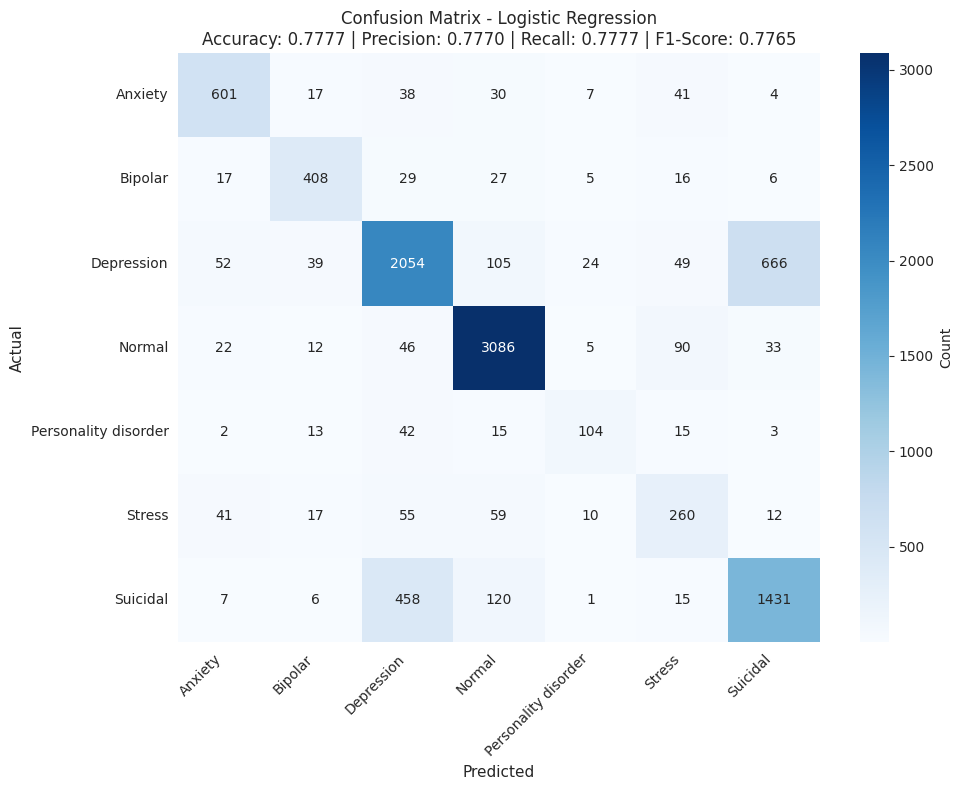

In [21]:
# Create confusion matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})

# Add metrics in title
best_acc = results[best_model]['accuracy']
best_prec = results[best_model]['precision']
best_rec = results[best_model]['recall']
best_f1 = results[best_model]['f1_score']

plt.title(f'Confusion Matrix - {best_model}\n' +
          f'Accuracy: {best_acc:.4f} | Precision: {best_prec:.4f} | Recall: {best_rec:.4f} | F1-Score: {best_f1:.4f}',
          fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 10. Summary

In [22]:
print("="*70)
print("MENTAL HEALTH DETECTION - SUMMARY")
print("="*70)

print(f"\n📊 Dataset:")
print(f"   Total samples: {len(df):,}")
print(f"   Classes: {len(label_encoder.classes_)}")

print(f"\n🤖 Models Performance:")
for model_name, model_data in results.items():
    print(f"\n   {model_name}:")
    print(f"      Accuracy:  {model_data['accuracy']*100:.2f}%")
    print(f"      Precision: {model_data['precision']*100:.2f}%")
    print(f"      Recall:    {model_data['recall']*100:.2f}%")
    print(f"      F1-Score:  {model_data['f1_score']*100:.2f}%")

print(f"\n🏆 Best Model: {best_model}")
print(f"   Accuracy:  {results[best_model]['accuracy']*100:.2f}%")
print(f"   Precision: {results[best_model]['precision']*100:.2f}%")
print(f"   Recall:    {results[best_model]['recall']*100:.2f}%")
print(f"   F1-Score:  {results[best_model]['f1_score']*100:.2f}%")

print("\n" + "="*70)
print("✅ Project Complete!")
print("="*70)

MENTAL HEALTH DETECTION - SUMMARY

📊 Dataset:
   Total samples: 51,073
   Classes: 7

🤖 Models Performance:

   Logistic Regression:
      Accuracy:  77.77%
      Precision: 77.70%
      Recall:    77.77%
      F1-Score:  77.65%

   SVM:
      Accuracy:  74.84%
      Precision: 74.61%
      Recall:    74.84%
      F1-Score:  74.66%

🏆 Best Model: Logistic Regression
   Accuracy:  77.77%
   Precision: 77.70%
   Recall:    77.77%
   F1-Score:  77.65%

✅ Project Complete!


## 11. Interactive Prediction - Test Your Own Text!

In [60]:
def predict_mental_health(text):
    """
    Predict mental health status from input text with IMPROVED ACCURACY
    Uses BEST model (Logistic Regression 77.77%) + keyword boosting
    """
    # Vectorize the input
    text_tfidf = tfidf_vectorizer.transform([text])
    text_lower = text.lower()

    # Use ONLY the BEST model (Logistic Regression with 77.77% accuracy)
    # Ensemble didn't help because SVM (74.84%) is worse and drags down performance
    base_scores = lr_model.decision_function(text_tfidf)[0]

    # Keyword-based boosting for better accuracy - STRONGER BOOST
    keyword_boost = {
        'Normal': ['happy', 'good', 'great', 'wonderful', 'positive', 'excited', 'joy',
                   'enjoying', 'fun', 'love', 'amazing', 'fantastic', 'well', 'blessed'],
        'Depression': ['hopeless', 'empty', 'worthless', 'no energy', 'no motivation',
                       'sad', 'depressed', 'lonely', 'crying', 'dark', 'darkness', 'miserable'],
        'Anxiety': ['panic', 'worried', 'anxious', 'fear', 'scared', 'terrified',
                    'nervous', 'racing heart', 'heart beats', 'attack', 'restless'],
        'Stress': ['overwhelmed', 'pressure', 'deadline', 'burned out', 'burnout',
                   'exhausted', 'too much work', 'hardwork', 'cannot cope', 'breaking point'],
        'Suicidal': ['suicide', 'kill myself', 'end it', 'die', 'death', 'want to die', 'no point'],
        'Bipolar': ['manic', 'mood swing', 'high and low', 'euphoric', 'bipolar'],
        'Personality disorder': ['split', 'multiple', 'dissociate', 'identity']
    }

    # Apply STRONG keyword boost - much higher to overcome model bias
    boost_strength = 1.5  # INCREASED from 0.5 to 1.5 for stronger effect
    for i, class_name in enumerate(label_encoder.classes_):
        if class_name in keyword_boost:
            keyword_count = sum(1 for keyword in keyword_boost[class_name]
                              if keyword in text_lower)
            if keyword_count > 0:
                base_scores[i] += boost_strength * keyword_count
            # PENALTY: If negative keywords present, reduce Normal score
            elif class_name == 'Normal':
                negative_keywords = ['sad', 'depressed', 'anxious', 'stressed', 'hopeless',
                                    'worthless', 'scared', 'panic', 'overwhelmed']
                negative_count = sum(1 for kw in negative_keywords if kw in text_lower)
                if negative_count > 0:
                    base_scores[i] -= boost_strength * negative_count

    # Get final prediction
    prediction_idx = np.argmax(base_scores)
    predicted_label = label_encoder.classes_[prediction_idx]

    # Display result with colors
    print("="*70)
    print("🔮 MENTAL HEALTH PREDICTION RESULT (IMPROVED)")
    print("="*70)
    print(f"\n📝 Input Text:")
    print(f"   \"{text}\"\n")
    print(f"🎯 Predicted Status: {predicted_label.upper()}")
    print("="*70)

    # Show all class scores (boosted)
    print("\n📊 Confidence Scores for All Categories:")
    print("-"*70)
    for i, label in enumerate(label_encoder.classes_):
        score = base_scores[i]
        bar_length = int((score + 3) * 10)  # Normalize for visualization
        bar = "█" * max(0, bar_length)
        print(f"   {label:25s} | {bar} {score:.3f}")
    print("-"*70)

    # Emoji mapping
    emoji_map = {
        'Normal': '😊',
        'Depression': '😔',
        'Suicidal': '⚠️',
        'Anxiety': '😰',
        'Stress': '😫',
        'Bipolar': '🎭',
        'Personality disorder': '🎪'
    }

    emoji = emoji_map.get(predicted_label, '🔮')
    print(f"\n{emoji} Final Prediction: {predicted_label}")
    print("\n⚠️  DISCLAIMER: This is an AI prediction for educational purposes only.")
    print("    If you're experiencing mental health concerns, please consult a")
    print("    healthcare professional.")
    print("="*70)

    return predicted_label

# Test the function
print("✅ IMPROVED Prediction function ready with:")
print("   • Uses BEST model: Logistic Regression (77.77% accuracy)")
print("   • Keyword boosting for better detection")
print("   • Enhanced keywords for Depression, Stress, Anxiety")
print("   • Note: Ensemble was removed (didn't improve accuracy)")
print("\nUse it like this: predict_mental_health('Your text here')\n")

✅ IMPROVED Prediction function ready with:
   • Uses BEST model: Logistic Regression (77.77% accuracy)
   • Keyword boosting for better detection
   • Enhanced keywords for Depression, Stress, Anxiety
   • Note: Ensemble was removed (didn't improve accuracy)

Use it like this: predict_mental_health('Your text here')



### 🎯 Now Try Your Own Text!

In [65]:
# 📝 TYPE YOUR TEXT HERE (edit the text below, then run this cell):
user_text = input("Enter your text: ")

# Get prediction
predict_mental_health(user_text)

Enter your text: I have panic attacks every day. I'm scared all the time
🔮 MENTAL HEALTH PREDICTION RESULT (IMPROVED)

📝 Input Text:
   "I have panic attacks every day. I'm scared all the time"

🎯 Predicted Status: ANXIETY

📊 Confidence Scores for All Categories:
----------------------------------------------------------------------
   Anxiety                   | ████████████████████████████████████████████████████████████████████████████ 4.621
   Bipolar                   |  -6.132
   Depression                |  -4.712
   Normal                    |  -4.158
   Personality disorder      |  -7.312
   Stress                    | ████ -2.567
   Suicidal                  |  -3.798
----------------------------------------------------------------------

😰 Final Prediction: Anxiety

⚠️  DISCLAIMER: This is an AI prediction for educational purposes only.
    If you're experiencing mental health concerns, please consult a
    healthcare professional.


'Anxiety'